# Clustering

## Data Prep

In [1]:
import pandas as pd

data = pd.read_csv('../Data/entertainment_clean.csv')

data.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [2]:
#check the data with data prep proceses

#1. row granularity

data.shape

(150, 4)

In [3]:
data.name.nunique()

150

In [4]:
#2 column non-null

data.isna()

,name,books,tv_shows,video_games
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [5]:
data[data.isna().any(axis=1)] # to check for rows with missing values

,name,books,tv_shows,video_games


In [6]:
data.dtypes #3 column numeric

name            object
books          float64
tv_shows       float64
video_games    float64
dtype: object

In [7]:
new_data = data.drop(columns='name')

new_data

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


In [8]:
new_data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


## Kmeans clustering

In [9]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)



In [11]:
kmeans.fit(new_data)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [12]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [13]:
cluster_labels = pd.Series(kmeans.labels_, name= 'clusters')
cluster_labels 

0      1
1      1
2      1
3      0
4      0
      ..
145    0
146    0
147    0
148    1
149    1
Name: clusters, Length: 150, dtype: int32

In [14]:
merged_data = pd.concat([new_data,cluster_labels], axis = 1)
merged_data

,books,tv_shows,video_games,clusters
0,0.5,4.6,4.9,1
1,0.0,4.5,4.8,1
2,0.5,4.5,5.0,1
3,3.5,4.5,6.6,0
4,2.8,3.8,5.6,0
...,...,...,...,...
145,5.2,4.6,6.9,0
146,6.0,4.6,6.7,0
147,5.5,5.7,7.7,0
148,0.0,6.1,5.2,1


## Kmeans cluster visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

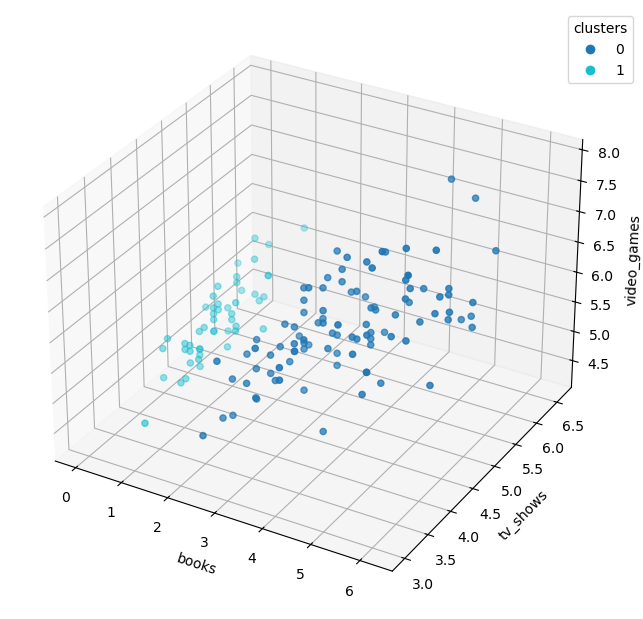

In [16]:
#create 3D Scatter plot
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
fig.add_axes(ax)


#specify data lanels

sp= ax.scatter(merged_data.books,merged_data.tv_shows, merged_data.video_games, 
               c= merged_data.clusters, cmap='tab10')
ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

#Add legend
plt.legend(*sp.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

In [17]:
#interpretation of the result

new_data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [18]:
kmeans.cluster_centers_ # row1 is cluster o and row2 is cluster 1, while each column represent the entertainments

array([[4.192, 4.314, 6.262],
       [0.596, 5.13 , 5.006]])

In [19]:
# more clusters

kmeans3 = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
kmeans3.fit(new_data)


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [20]:
kmeans3.labels_

array([2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2])

In [21]:
kmeans3.cluster_centers_

array([[3.31346154, 4.11730769, 5.91346154],
       [5.14375   , 4.52708333, 6.63958333],
       [0.596     , 5.13      , 5.006     ]])

In [22]:
kmeans3_clusters=pd.DataFrame( kmeans3.cluster_centers_, columns=new_data.columns)
kmeans3_clusters

,books,tv_shows,video_games
0,3.313462,4.117308,5.913462
1,5.143750,4.527083,6.639583
2,0.596000,5.130000,5.006000


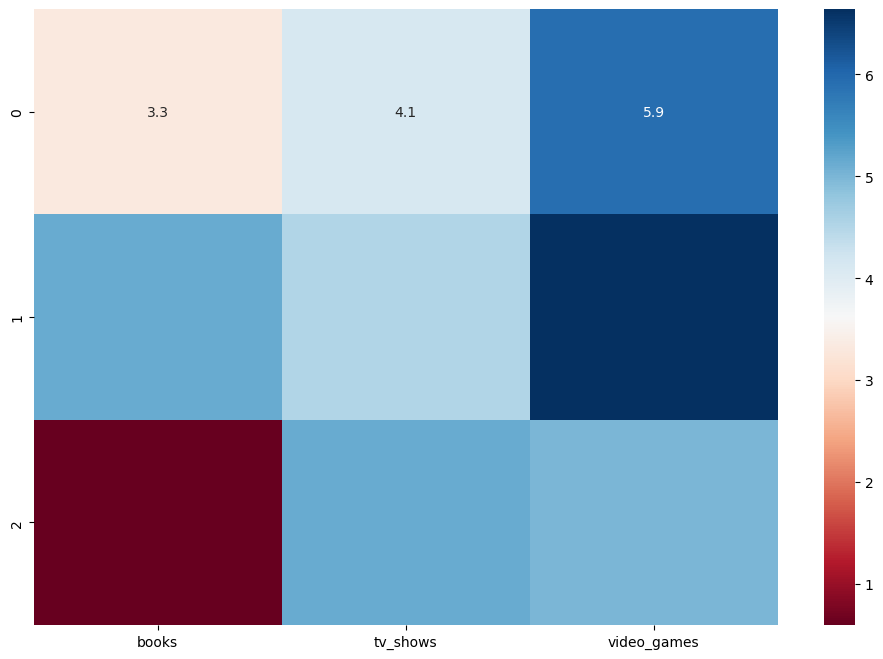

In [56]:
#view the clusters in heatmap visual
plt.figure(figsize=(12, 8))
sns.heatmap(kmeans3_clusters,cmap='RdBu', annot=True);

# Inertia plotting to select the best number of cluster

In [24]:
kmeans.inertia_ #cluster = 2

206.44200000000004

In [25]:
kmeans3.inertia_ #cluster = 3

105.47568525641027

In [26]:
# using interia plot, lets examine the best number of clusters from 2 to 15
for k in range(2,16):
    kmeansK = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeansK.fit(new_data)
    print(kmeansK.inertia_) 

206.44200000000004
105.47568525641027
82.52582377260981
72.83050000000003
60.325127914614164
56.711440410047075
49.89667417184266
43.68373433583959
41.60633155806181
39.740197954822925
38.02685729548227
36.22882511932508
33.37054924487277
31.969294011544008


In [27]:
#in list structure
inertia_values=[]
for k in range(2,16):
    kmeansK = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeansK.fit(new_data)
    inertia_values.append(kmeansK.inertia_) 

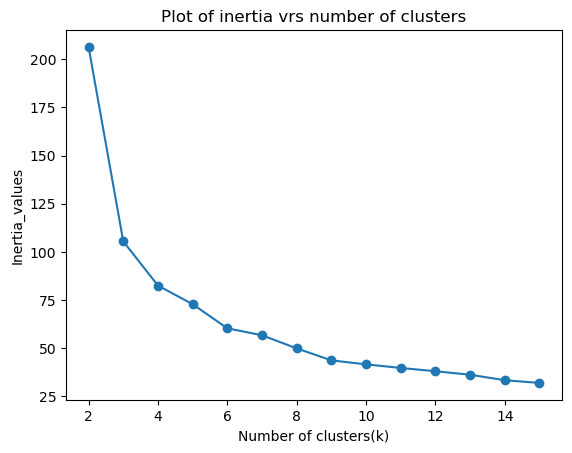

In [29]:
#scatter plot of the inertia values vrs the number of clusters
inertia_series=pd.Series(inertia_values, index=range(2,16))
inertia_series.plot(marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia_values")
plt.title("Plot of inertia vrs number of clusters")
plt.show()

# hirarchical clustering

In [96]:
new_data

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


In [99]:
from scipy.cluster.hierarchy import linkage, dendrogram

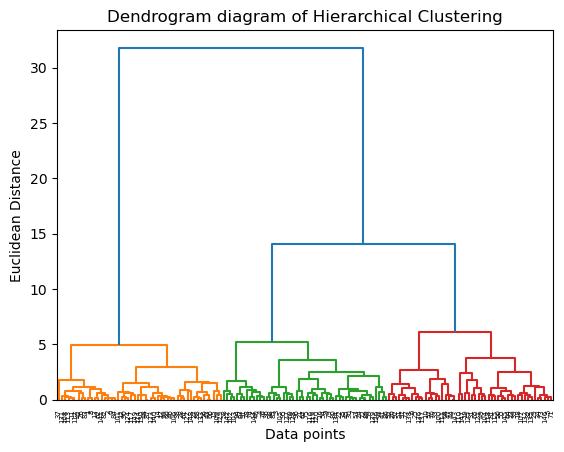

In [103]:
linkage_matrix= linkage(new_data, method='ward',metric='euclidean')
Dendrogram = dendrogram(linkage_matrix, color_threshold=10)
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram diagram of Hierarchical Clustering");

In [104]:
# Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
agg= AgglomerativeClustering(3)

In [105]:
agg.fit(new_data)


AgglomerativeClustering(n_clusters=3)

In [110]:
agg.labels_

array([1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1], dtype=int64)

In [109]:
from collections import Counter

In [111]:
Counter(agg.labels_)

Counter({1: 50, 2: 50, 0: 50})

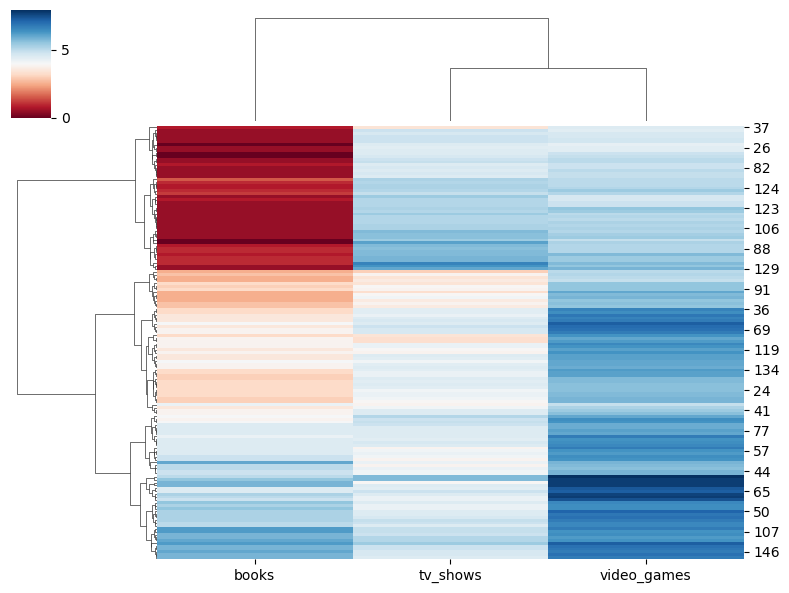

In [118]:
#clustermap on the dendrogram

sns.clustermap(new_data,method='ward',cmap='RdBu',figsize=(8,6), xticklabels=new_data.columns)
plt.show()

## DBSCAN

In [145]:
from sklearn.cluster import DBSCAN

In [146]:
dbscan= DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(new_data)

DBSCAN()

In [147]:
dbscan.labels_

array([ 0, -1,  0,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  0, -1,  1,
        0,  1, -1,  1, -1,  1,  1,  1,  1,  0,  0,  0, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  0,  1,  1,  1, -1,  0, -1,  1,  0, -1,  0, -1,  1,
        1, -1,  1,  1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  1, -1,  0, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  0,
       -1,  1, -1,  1,  0,  1,  0, -1, -1, -1,  0,  0,  0,  1,  1,  0,  1,
        1,  1, -1, -1,  0,  0, -1, -1,  1,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  1, -1,  1,  1,  1, -1, -1,  0],
      dtype=int64)

In [148]:
from sklearn.metrics import silhouette_score

In [149]:
# number of clusters in labels, ignoring noise points
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

2

In [150]:
sil_score= silhouette_score(new_data,dbscan.labels_,metric='euclidean',sample_size=None)
sil_score

0.3419620951011187

In [151]:
# loop through many values of epsilon and min_samples
import numpy as np

results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1, 2, .1)
min_samples_values = np.arange(2, 10, 1)

# loop through the combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(new_data)
        labels = dbscan.labels_
        
        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)
        
        # calculate the silhouette score
        if n_clusters > 1:  # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(new_data, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None
        
        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                "Number of Noise Points", "Silhouette Score"])
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [152]:
# view the silhouette scores (higher is better)
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
109,1.4,7,2,0,0.628673
107,1.4,5,2,0,0.628673
106,1.4,4,2,0,0.628673
105,1.4,3,2,0,0.628673
...,...,...,...,...,...
147,1.9,5,1,0,NaN
148,1.9,6,1,0,NaN
149,1.9,7,1,0,NaN
150,1.9,8,1,0,NaN


In [153]:
# view only the top result for each silhouette score
(dbscan_results.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686


In [187]:
# Using a function
import numpy as np
# loop through many values of epsilon and min_samples
def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            
            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
            
            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
            
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

## Compare the best model from the 3 cluster model

In [ ]:
# use silhoutte scores of the three models

# Assignment

In [30]:
import pandas as pd

data_cereal = pd.read_csv('../Data/cereal.csv')

data_cereal.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [31]:
data_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cereal Name            74 non-null     object
 1   Manufacturer           74 non-null     object
 2   Calories               74 non-null     int64 
 3   Protein (g)            74 non-null     int64 
 4   Fat                    74 non-null     int64 
 5   Sugars                 74 non-null     int64 
 6   Vitamins and Minerals  74 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.2+ KB


In [32]:
prep_data= data_cereal.drop(columns= ['Cereal Name','Manufacturer'],index=1)
prep_data

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25
5,110,2,2,10,25
...,...,...,...,...,...
69,110,2,1,3,25
70,110,1,1,12,25
71,100,3,1,3,25
72,100,3,1,3,25


In [33]:
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)


In [34]:
kmeans.fit(prep_data)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [35]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [36]:
data_series=pd.Series(kmeans.labels_, name= 'clusters')
data_series

0     0
1     0
2     0
3     1
4     1
     ..
68    1
69    1
70    1
71    1
72    1
Name: clusters, Length: 73, dtype: int32

In [37]:
merged_data= pd.concat([prep_data,data_series], axis=1)
merged_data

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,clusters
0,70.0,4.0,1.0,6.0,25.0,0.0
2,70.0,4.0,1.0,5.0,25.0,0.0
3,50.0,4.0,0.0,0.0,25.0,1.0
4,110.0,2.0,2.0,8.0,25.0,1.0
5,110.0,2.0,2.0,10.0,25.0,1.0
...,...,...,...,...,...,...
70,110.0,1.0,1.0,12.0,25.0,1.0
71,100.0,3.0,1.0,3.0,25.0,1.0
72,100.0,3.0,1.0,3.0,25.0,1.0
73,110.0,2.0,1.0,8.0,25.0,NaN


In [38]:
kmeans.cluster_centers_

array([[ 75.        ,   3.1       ,   0.4       ,   1.        ,
          7.5       ],
       [110.15873016,   2.3968254 ,   0.96825397,   7.66666667,
         32.14285714]])

In [39]:
#Assignment 2: Inertia ploting

# using interia plot, lets examine the best number of clusters from 2 to 15
for k in range(2,15):
    kmeansK = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeansK.fit(prep_data)
    print(kmeansK.inertia_) 

46998.94285714285
16484.10928961749
12369.839743589746
8900.078571428572
7134.616666666666
5420.783333333332
3928.339173789173
3218.3058404558387
2256.2518952062424
1569.2145104895105
1170.263752913753
1066.763752913753
779.2637529137528


In [41]:
#in list structure
inertia_valuesK=[]
for k in range(2,15):
    kmeansK = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeansK.fit(prep_data)
    inertia_valuesK.append(kmeansK.inertia_) 

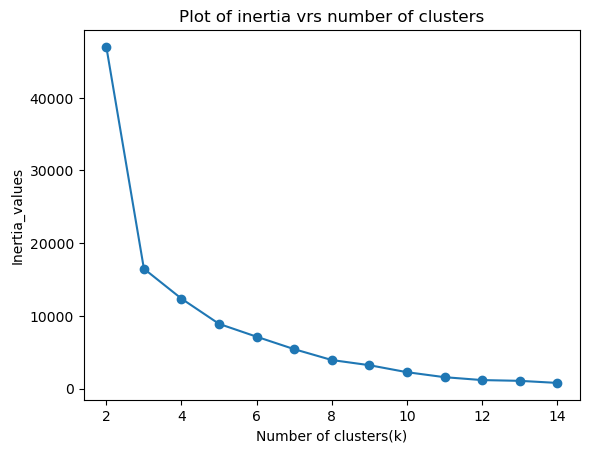

In [42]:
#scatter plot of the inertia values vrs the number of clusters
inertia_seriesK=pd.Series(inertia_valuesK, index=range(2,15))
inertia_seriesK.plot(marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia_values")
plt.title("Plot of inertia vrs number of clusters")
plt.show()

In [47]:
#the elbow is at cluster=3
kmeans_3 = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
kmeans_3.fit(prep_data)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [48]:
kmeans_3.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1])

In [49]:
kmeans_3.cluster_centers_

array([[ 61.66666667,   2.83333333,   0.33333333,   1.83333333,
         12.5       ],
       [108.52459016,   2.44262295,   0.95081967,   7.27868852,
         23.36065574],
       [116.66666667,   2.66666667,   0.83333333,   6.33333333,
        100.        ]])

In [51]:
kmeans_3_clusters=pd.DataFrame( kmeans_3.cluster_centers_, columns=prep_data.columns)
kmeans_3_clusters

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,61.666667,2.833333,0.333333,1.833333,12.500000
1,108.524590,2.442623,0.950820,7.278689,23.360656
2,116.666667,2.666667,0.833333,6.333333,100.000000


In [ ]:
#cluster0:low calories, low vit & mins
#cluster 1:high calories,  low vit & mins
#cluster 2: high calories, high vit & mins

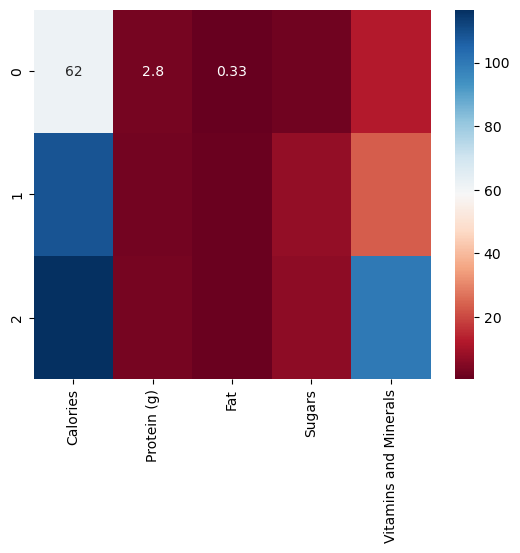

In [61]:

sns.heatmap(kmeans_3_clusters,cmap='RdBu',annot=True);

In [63]:
#Assignment 3

prep2_data= prep_data.drop(columns= ['Fat'])
prep2_data.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25
5,110,2,10,25


In [64]:
#standardize
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(prep2_data)

std_data = pd.DataFrame(standardized, columns=prep2_data.columns)
std_data

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.924623,1.386310,-0.168728,-0.167128
1,-1.924623,1.386310,-0.392675,-0.167128
2,-3.013751,1.386310,-1.512412,-0.167128
3,0.253632,-0.453701,0.279167,-0.167128
4,0.253632,-0.453701,0.727062,-0.167128
...,...,...,...,...
68,0.253632,-0.453701,-0.840570,-0.167128
69,0.253632,-1.373707,1.174957,-0.167128
70,-0.290931,0.466304,-0.840570,-0.167128
71,-0.290931,0.466304,-0.840570,-0.167128


In [67]:
#in list structure
inertia_vals=[]
for k in range(2,15):
    kmeansK = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeansK.fit(std_data)
    inertia_vals.append(kmeansK.inertia_) 

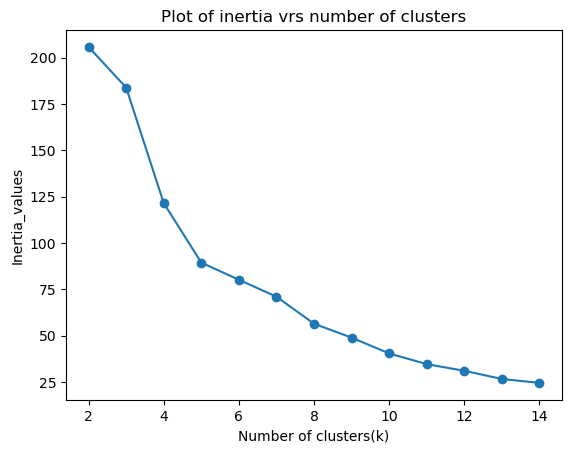

In [68]:
#scatter plot of the inertia values vrs the number of clusters
inertia_seriesK=pd.Series(inertia_vals, index=range(2,15))
inertia_seriesK.plot(marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia_values")
plt.title("Plot of inertia vrs number of clusters")
plt.show()

In [84]:
#the elbow is at cluster=3
kmeans_5 = KMeans(n_clusters = 5, n_init = 'auto', random_state = 42)
kmeans_5.fit(std_data)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [85]:
kmeans_5.labels_

array([0, 0, 0, 4, 4, 4, 4, 1, 1, 4, 2, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 4,
       1, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 3, 1, 1, 4, 1, 4, 1,
       4, 4, 1, 4, 4, 3, 0, 0, 1, 2, 4, 1, 1, 1, 1, 0, 0, 0, 4, 2, 1, 3,
       3, 3, 1, 4, 1, 1, 4])

In [86]:
kmeans_5.cluster_centers_

array([[-1.99269347,  0.35130353, -1.20448451, -0.86032787],
       [-0.16991719,  0.1255614 , -0.55026764, -0.20820624],
       [ 0.0721112 ,  2.91965267, -1.2884648 , -0.53683446],
       [ 0.61667506,  0.15963569, -0.09407838,  3.16023305],
       [ 0.57285958, -0.54887442,  0.99734369, -0.16712771]])

In [87]:
kmeans_5_clusters=pd.DataFrame( kmeans_5.cluster_centers_, columns=std_data.columns)
kmeans_5_clusters

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.992693,0.351304,-1.204485,-0.860328
1,-0.169917,0.125561,-0.550268,-0.208206
2,0.072111,2.919653,-1.288465,-0.536834
3,0.616675,0.159636,-0.094078,3.160233
4,0.572860,-0.548874,0.997344,-0.167128


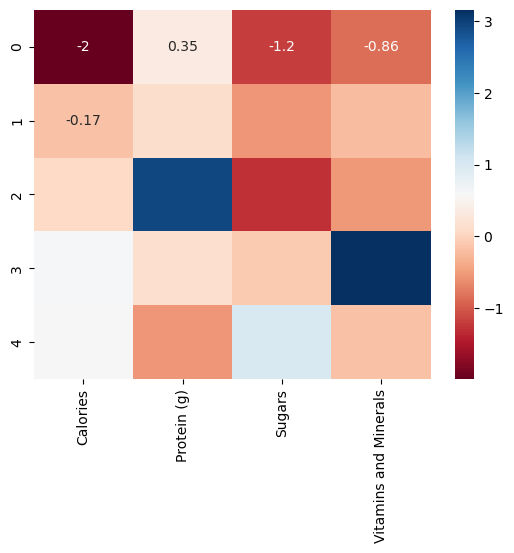

In [88]:
sns.heatmap(kmeans_5_clusters,cmap='RdBu',annot=True);

In [78]:
#Assignment 4 select the best model
kmeans_3.labels_
#cluster0:low calories, low vit & mins(empty cereals)
#cluster 1:high calories,  low vit & mins (typical cereals)
#cluster 2: high calories, high c (hearty cereals)

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 1])

In [89]:
kmeans_5.labels_
#cluster 0: low calories
#cluster1: low calories,sugar and vit & mins
#cluster2: high protein
#cluster 3: high vit & mins
#cluster4: typical cereals

array([0, 0, 0, 4, 4, 4, 4, 1, 1, 4, 2, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 4,
       1, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 3, 3, 1, 1, 4, 1, 4, 1,
       4, 4, 1, 4, 4, 3, 0, 0, 1, 2, 4, 1, 1, 1, 1, 0, 0, 0, 4, 2, 1, 3,
       3, 3, 1, 4, 1, 1, 4])

In [83]:
model1_clusters= pd.Series(kmeans_3.labels_, name='model1_clusters')
model1_names=model1_clusters.map({0:'empty cereals',1:'typical cereals',2:'hearty cereals'})
model1_names

0       empty cereals
1       empty cereals
2       empty cereals
3     typical cereals
4     typical cereals
           ...       
68    typical cereals
69    typical cereals
70      empty cereals
71      empty cereals
72    typical cereals
Name: model1_clusters, Length: 73, dtype: object

In [94]:
model2_clusters= pd.Series(kmeans_5.labels_, name='model2_clusters')
model2_names=model2_clusters.map({0:'low calories',1:'low calories,sugar and vit & mins',2:'high protein', 3:'high vit & mins',4:'typical cereals'})
model2_names

0                          low calories
1                          low calories
2                          low calories
3                       typical cereals
4                       typical cereals
                    ...                
68    low calories,sugar and vit & mins
69                      typical cereals
70    low calories,sugar and vit & mins
71    low calories,sugar and vit & mins
72                      typical cereals
Name: model2_clusters, Length: 73, dtype: object

In [92]:
model1_names.value_counts()

model1_clusters
typical cereals    48
empty cereals      19
hearty cereals      6
Name: count, dtype: int64

In [95]:
model2_names.value_counts()

model2_clusters
typical cereals                      29
low calories,sugar and vit & mins    27
low calories                          8
high vit & mins                       6
high protein                          3
Name: count, dtype: int64

In [119]:
#Assignment 6
from scipy.cluster.hierarchy import linkage, dendrogram

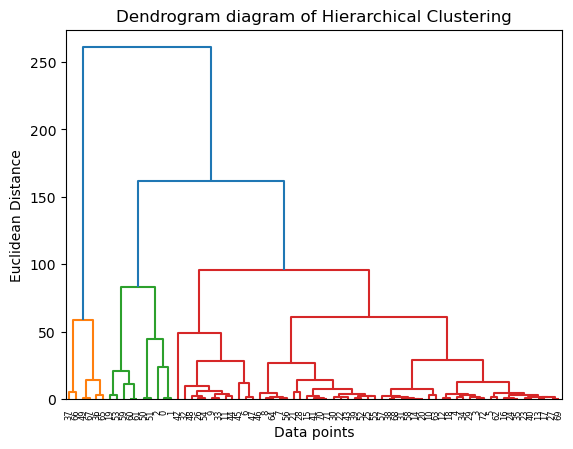

In [124]:
linkage_matrix= linkage(prep_data, method='ward',metric='euclidean')
Dendrogram = dendrogram(linkage_matrix, color_threshold=100)
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram diagram of Hierarchical Clustering");

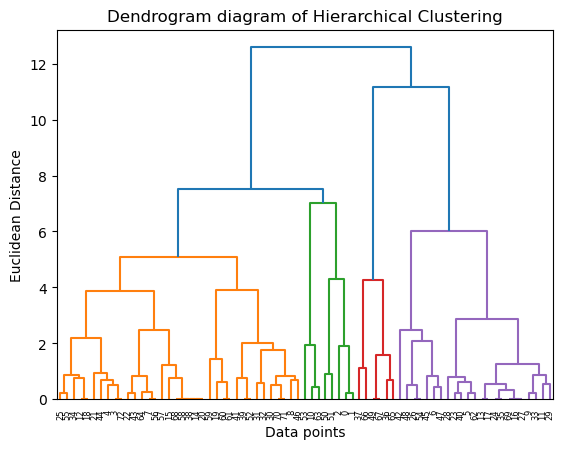

In [126]:
linkage_matrix= linkage(std_data, method='ward',metric='euclidean')
Dendrogram = dendrogram(linkage_matrix, color_threshold=7.5)
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram diagram of Hierarchical Clustering");

In [131]:
# Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
agg4= AgglomerativeClustering(4)
agg4.fit(std_data)

AgglomerativeClustering(n_clusters=4)

In [132]:
agg4.labels_

array([0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 1, 3,
       3, 1, 3, 1, 1, 2, 0, 0, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 2,
       2, 2, 3, 1, 3, 3, 3], dtype=int64)

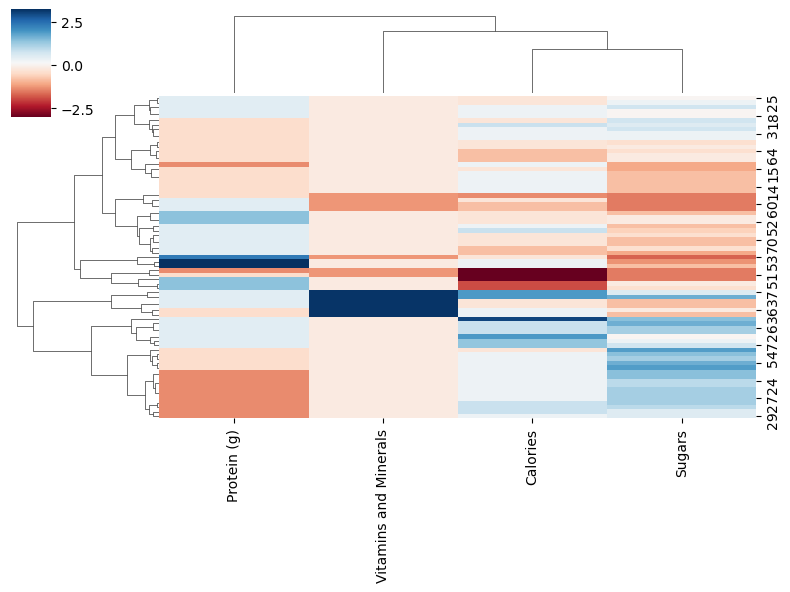

In [133]:
#clustermap on the dendrogram

sns.clustermap(std_data,method='ward',cmap='RdBu',figsize=(8,6), xticklabels=std_data.columns)
plt.show()

In [ ]:
#cluster1:general cereals
#cluster2: high protein
#cluster3: high vitamins
#cluster4: high suger

In [180]:
# Using a function

# loop through many values of epsilon and min_samples
def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            
            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
            
            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
            
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [181]:
dbscan_results1 = tune_dbscan(prep_data)
dbscan_results1.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,7,58,-0.301895
1,0.1,3,1,70,NaN
2,0.1,4,0,73,NaN
3,0.1,5,0,73,NaN
4,0.1,6,0,73,NaN


In [183]:
dbscan_results2=tune_dbscan(std_data)
dbscan_results2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,45,-0.007359
1,0.1,3,2,65,-0.214554
2,0.1,4,1,68,NaN
3,0.1,5,1,68,NaN
4,0.1,6,0,73,NaN


In [185]:
# view the silhouette scores (higher is better)
dbscan_results1.sort_values('Silhouette Score', ascending=False).groupby('Silhouette Score').head(1)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,12,22,0.239646
120,1.6,2,13,24,0.162000
145,1.9,3,6,34,0.092104
138,1.8,4,6,35,0.081194
96,1.3,2,13,33,0.056764
129,1.7,3,6,38,0.037343
139,1.8,5,4,45,-0.058516
114,1.5,4,4,48,-0.090382
97,1.3,3,4,51,-0.148303
115,1.5,5,2,56,-0.149549


In [186]:
# view the silhouette scores (higher is better)
dbscan_results2.sort_values('Silhouette Score', ascending=False).groupby('Silhouette Score').head(1)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
146,1.9,4,2,2,0.437065
138,1.8,4,2,3,0.423587
130,1.7,4,2,6,0.416429
129,1.7,3,2,3,0.416006
113,1.5,3,2,9,0.414613
112,1.5,2,5,3,0.411590
122,1.6,4,2,8,0.411148
89,1.2,3,2,11,0.406570
120,1.6,2,5,2,0.388330
128,1.7,2,3,1,0.356468


In [189]:
# the best score was on standardized data with eps=1.9 and min_sample=4
dbscan= DBSCAN(eps=1.9,min_samples=4)
dbscan.fit(std_data)

DBSCAN(eps=1.9, min_samples=4)

In [190]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1,
        0,  0,  0,  0,  0], dtype=int64)

In [192]:
Counter(dbscan.labels_)

Counter({0: 67, 1: 4, -1: 2})

In [ ]:
### General clustering Assignment